nba선수가 아닌 nba팀에대한 승률예측을 회귀분석하겠습니다(현재 선형 회귀 모델까지만)

In [73]:
import pandas as pd
import numpy as np

In [74]:
from IPython.display import Image

In [75]:
 a=pd.read_csv('data/nba_team_stats_00_to_21.csv')

In [76]:
a

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,621,Atlanta Hawks,82,25,57,0.305,48.1,91.0,35.1,81.3,...,42.9,19.0,16.7,7.7,4.7,6.3,22.7,0.1,-5.2,2000-01
622,622,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01
623,623,Washington Wizards,82,19,63,0.232,48.0,93.2,34.5,78.7,...,41.3,20.1,17.0,7.7,4.7,6.2,23.3,0.1,-6.7,2000-01
624,624,Golden State Warriors,82,17,65,0.207,48.2,92.5,35.8,87.5,...,45.5,21.8,15.9,9.0,5.0,6.0,21.1,0.1,-9.0,2000-01


In [77]:
a.columns

Index(['teamstatspk', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-',
       'SEASON'],
      dtype='object')

In [78]:
 b=pd.read_csv('data/nba_team_stats_playoffs_00_to_21.csv')

In [79]:
b

,teamstatspk,team,games_played,wins,losses,win_percentage,minutes,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Milwaukee Bucks,23,16,7,0.696,48.4,110.3,42.1,91.1,...,49.0,22.8,12.7,7.8,4.2,3.8,18.0,20.1,5.1,2020-21
1,1,Phoenix Suns,22,14,8,0.636,48.0,109.0,40.9,85.0,...,42.7,23.2,11.9,6.5,4.2,3.6,19.7,18.5,4.5,2020-21
2,2,Brooklyn Nets,12,7,5,0.583,48.4,112.5,40.7,86.2,...,42.6,22.6,11.6,7.1,4.8,6.2,21.2,18.6,6.3,2020-21
3,3,Philadelphia 76ers,12,7,5,0.583,48.0,116.3,42.5,85.8,...,44.7,24.9,12.8,8.0,6.2,3.8,23.0,23.8,7.5,2020-21
4,4,Atlanta Hawks,18,10,8,0.556,48.0,106.3,38.9,86.8,...,42.4,20.2,12.4,6.7,4.4,4.3,21.2,20.3,-1.5,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,Minnesota Timberwolves,4,1,3,0.250,48.0,82.0,30.8,79.5,...,42.5,18.5,12.8,7.5,5.8,4.5,24.3,0.0,-6.5,2000-01
332,332,Orlando Magic,4,1,3,0.250,49.3,102.8,39.0,89.8,...,43.8,22.0,11.3,8.0,6.3,5.3,26.5,0.3,-5.8,2000-01
333,333,Phoenix Suns,4,1,3,0.250,48.0,88.5,34.0,89.5,...,44.3,21.3,13.8,9.8,5.8,5.3,23.5,0.0,-9.5,2000-01
334,334,Miami Heat,3,0,3,0.000,48.0,78.3,29.7,72.3,...,35.0,16.7,18.7,5.0,5.0,4.0,25.3,0.3,-22.3,2000-01


플레이오프 데이터에서 필요한 컬럼만 가져오기

In [80]:
b.head()

,teamstatspk,team,games_played,wins,losses,win_percentage,minutes,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Milwaukee Bucks,23,16,7,0.696,48.4,110.3,42.1,91.1,...,49.0,22.8,12.7,7.8,4.2,3.8,18.0,20.1,5.1,2020-21
1,1,Phoenix Suns,22,14,8,0.636,48.0,109.0,40.9,85.0,...,42.7,23.2,11.9,6.5,4.2,3.6,19.7,18.5,4.5,2020-21
2,2,Brooklyn Nets,12,7,5,0.583,48.4,112.5,40.7,86.2,...,42.6,22.6,11.6,7.1,4.8,6.2,21.2,18.6,6.3,2020-21
3,3,Philadelphia 76ers,12,7,5,0.583,48.0,116.3,42.5,85.8,...,44.7,24.9,12.8,8.0,6.2,3.8,23.0,23.8,7.5,2020-21
4,4,Atlanta Hawks,18,10,8,0.556,48.0,106.3,38.9,86.8,...,42.4,20.2,12.4,6.7,4.4,4.3,21.2,20.3,-1.5,2020-21


In [81]:
b.columns

Index(['teamstatspk', 'team', 'games_played', 'wins', 'losses',
       'win_percentage', 'minutes', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [90]:
list_b = [ 'points','field_goals_attempted','field_goal_percentage','three_pointers_attempted','three_point_percentage', 'blocks','assists','steals', 'blocks_attempted', 'personal_fouls','turnovers', 'rebounds','win_percentage']
win_percentage_playoffs = b.loc[:, list_b]
win_percentage_playoffs
#플레이오프시즌 데이터 득점, 필드골 시도, 필드골 성공률, 3점슛 시도, 3점슛 성공률, 블락, 어시스트, 스틸, 블락 시도, 개인 파울, 턴오버, 리바운드, 마지막으로 예측할 승률 컬럼을 가져옵니다

,points,field_goals_attempted,field_goal_percentage,three_pointers_attempted,three_point_percentage,blocks,assists,steals,blocks_attempted,personal_fouls,turnovers,rebounds,win_percentage
0,110.3,91.1,46.2,35.0,32.1,4.2,22.8,7.8,3.8,18.0,12.7,49.0,0.696
1,109.0,85.0,48.1,29.7,37.6,4.2,23.2,6.5,3.6,19.7,11.9,42.7,0.636
2,112.5,86.2,47.2,35.6,38.2,4.8,22.6,7.1,6.2,21.2,11.6,42.6,0.583
3,116.3,85.8,49.6,28.4,39.3,6.2,24.9,8.0,3.8,23.0,12.8,44.7,0.583
4,106.3,86.8,44.9,34.2,34.3,4.4,20.2,6.7,4.3,21.2,12.4,42.4,0.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,82.0,79.5,38.7,10.0,30.0,5.8,18.5,7.5,4.5,24.3,12.8,42.5,0.250
332,102.8,89.8,43.5,20.5,39.0,6.3,22.0,8.0,5.3,26.5,11.3,43.8,0.250
333,88.5,89.5,38.0,17.0,25.0,5.8,21.3,9.8,5.3,23.5,13.8,44.3,0.250
334,78.3,72.3,41.0,16.7,32.0,5.0,16.7,5.0,4.0,25.3,18.7,35.0,0.000


In [83]:
win_percentage_playoffs.isna().any()#결측치 확인

points                      False
field_goals_attempted       False
field_goal_percentage       False
three_pointers_attempted    False
three_point_percentage      False
blocks                      False
assists                     False
steals                      False
blocks_attempted            False
personal_fouls              False
turnovers                   False
rebounds                    False
win_percentage              False
dtype: bool

정규시즌 데이터 가져오기

In [87]:
a.columns

Index(['teamstatspk', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-',
       'SEASON'],
      dtype='object')

In [88]:
b.columns

Index(['teamstatspk', 'team', 'games_played', 'wins', 'losses',
       'win_percentage', 'minutes', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [91]:
list_a = [ 'PTS','FGA','FG%','3PA','3P%', 'BLK','AST','STL', 'BLKA', 'PF','TOV', 'REB','WIN%']
win_percentage = a.loc[:, list_a]
win_percentage
#플레이 오프 데이터에서 가져온 컬럼에 해당된 정규시즌 컬럼을 가져옵니다

,PTS,FGA,FG%,3PA,3P%,BLK,AST,STL,BLKA,PF,TOV,REB,WIN%
0,112.7,89.4,47.8,31.7,36.3,4.3,26.5,8.6,4.0,19.3,13.3,46.1,0.808
1,110.9,86.5,46.7,40.1,36.4,4.9,27.5,9.4,4.1,20.3,15.6,46.5,0.755
2,112.7,93.4,45.7,32.7,33.9,6.4,25.1,10.1,6.4,19.1,13.3,48.6,0.673
3,108.7,85.7,45.9,36.1,37.5,3.3,25.9,7.6,4.4,20.5,14.9,44.6,0.630
4,111.6,87.0,47.8,30.0,37.2,4.6,24.5,7.2,5.2,18.8,13.0,43.0,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,91.0,81.3,43.1,11.4,35.7,4.7,19.0,7.7,6.3,22.7,16.7,42.9,0.305
622,91.7,79.7,43.9,11.5,34.3,4.4,23.2,7.1,5.8,21.1,15.7,40.5,0.280
623,93.2,78.7,43.9,10.3,32.4,4.7,20.1,7.7,6.2,23.3,17.0,41.3,0.232
624,92.5,87.5,40.9,11.8,29.3,5.0,21.8,9.0,6.0,21.1,15.9,45.5,0.207


In [92]:
w_col = {'WIN%':'win_percentage', 'PTS':'points', "FGA":'field_goals_attempted',
       'FG%':'field_goal_percentage','3PA': 'three_pointers_attempted',
       '3P%':'three_point_percentage', 'BLK':'blocks','AST': 'assists','STL': 'steals',
       'BLKA':'blocks_attempted', 'PF':'personal_fouls', 'TOV':'turnovers','REB': 'rebounds'}#컬럼 이름을 플레이오프 데이터랑 똑같이, 또 직관적으로 바꿔줍니다

In [94]:
#win_percentage.rename(WIN% = win_percentage, inplace=True)


win_percentage.rename(columns = w_col, inplace=True)
win_percentage
#바꾼 컬럼들이 잘 바뀌었는 지 확인합니다

,points,field_goals_attempted,field_goal_percentage,three_pointers_attempted,three_point_percentage,blocks,assists,steals,blocks_attempted,personal_fouls,turnovers,rebounds,win_percentage
0,112.7,89.4,47.8,31.7,36.3,4.3,26.5,8.6,4.0,19.3,13.3,46.1,0.808
1,110.9,86.5,46.7,40.1,36.4,4.9,27.5,9.4,4.1,20.3,15.6,46.5,0.755
2,112.7,93.4,45.7,32.7,33.9,6.4,25.1,10.1,6.4,19.1,13.3,48.6,0.673
3,108.7,85.7,45.9,36.1,37.5,3.3,25.9,7.6,4.4,20.5,14.9,44.6,0.630
4,111.6,87.0,47.8,30.0,37.2,4.6,24.5,7.2,5.2,18.8,13.0,43.0,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,91.0,81.3,43.1,11.4,35.7,4.7,19.0,7.7,6.3,22.7,16.7,42.9,0.305
622,91.7,79.7,43.9,11.5,34.3,4.4,23.2,7.1,5.8,21.1,15.7,40.5,0.280
623,93.2,78.7,43.9,10.3,32.4,4.7,20.1,7.7,6.2,23.3,17.0,41.3,0.232
624,92.5,87.5,40.9,11.8,29.3,5.0,21.8,9.0,6.0,21.1,15.9,45.5,0.207


In [95]:
win_percentage

,points,field_goals_attempted,field_goal_percentage,three_pointers_attempted,three_point_percentage,blocks,assists,steals,blocks_attempted,personal_fouls,turnovers,rebounds,win_percentage
0,112.7,89.4,47.8,31.7,36.3,4.3,26.5,8.6,4.0,19.3,13.3,46.1,0.808
1,110.9,86.5,46.7,40.1,36.4,4.9,27.5,9.4,4.1,20.3,15.6,46.5,0.755
2,112.7,93.4,45.7,32.7,33.9,6.4,25.1,10.1,6.4,19.1,13.3,48.6,0.673
3,108.7,85.7,45.9,36.1,37.5,3.3,25.9,7.6,4.4,20.5,14.9,44.6,0.630
4,111.6,87.0,47.8,30.0,37.2,4.6,24.5,7.2,5.2,18.8,13.0,43.0,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,91.0,81.3,43.1,11.4,35.7,4.7,19.0,7.7,6.3,22.7,16.7,42.9,0.305
622,91.7,79.7,43.9,11.5,34.3,4.4,23.2,7.1,5.8,21.1,15.7,40.5,0.280
623,93.2,78.7,43.9,10.3,32.4,4.7,20.1,7.7,6.2,23.3,17.0,41.3,0.232
624,92.5,87.5,40.9,11.8,29.3,5.0,21.8,9.0,6.0,21.1,15.9,45.5,0.207


In [96]:
win_percentage_playoffs

,points,field_goals_attempted,field_goal_percentage,three_pointers_attempted,three_point_percentage,blocks,assists,steals,blocks_attempted,personal_fouls,turnovers,rebounds,win_percentage
0,110.3,91.1,46.2,35.0,32.1,4.2,22.8,7.8,3.8,18.0,12.7,49.0,0.696
1,109.0,85.0,48.1,29.7,37.6,4.2,23.2,6.5,3.6,19.7,11.9,42.7,0.636
2,112.5,86.2,47.2,35.6,38.2,4.8,22.6,7.1,6.2,21.2,11.6,42.6,0.583
3,116.3,85.8,49.6,28.4,39.3,6.2,24.9,8.0,3.8,23.0,12.8,44.7,0.583
4,106.3,86.8,44.9,34.2,34.3,4.4,20.2,6.7,4.3,21.2,12.4,42.4,0.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,82.0,79.5,38.7,10.0,30.0,5.8,18.5,7.5,4.5,24.3,12.8,42.5,0.250
332,102.8,89.8,43.5,20.5,39.0,6.3,22.0,8.0,5.3,26.5,11.3,43.8,0.250
333,88.5,89.5,38.0,17.0,25.0,5.8,21.3,9.8,5.3,23.5,13.8,44.3,0.250
334,78.3,72.3,41.0,16.7,32.0,5.0,16.7,5.0,4.0,25.3,18.7,35.0,0.000


10장 선형회귀

경사 하강법으로 회귀 모델의 파라미터 구하기

In [30]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [31]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [97]:
X = win_percentage[['three_point_percentage']].values
y = win_percentage['win_percentage'].values
#선형회귀로 3점 슛 성공률과 승률 컬럼을 가져옵니다

In [99]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
#정규화 작업을 해줍니다, 이유는 3점슛 성공률은 0부터 100이고 승률은 0부터 1이기 때문입니다


In [100]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

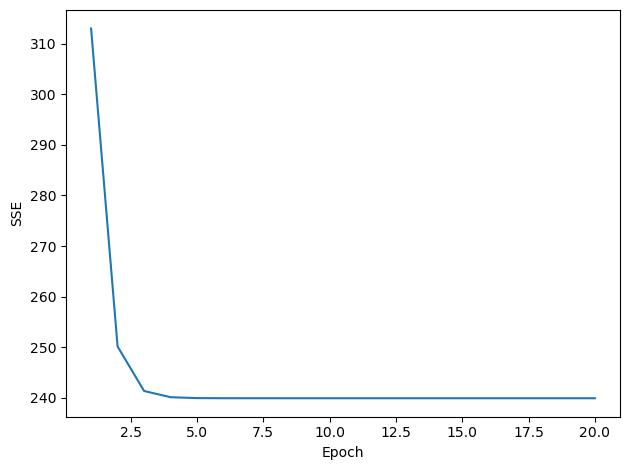

In [101]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()
#당연하게 승률과 3점성공률을 돌린 횟수가 많을 수록 오차값이 떨어지고 있습니다

In [102]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

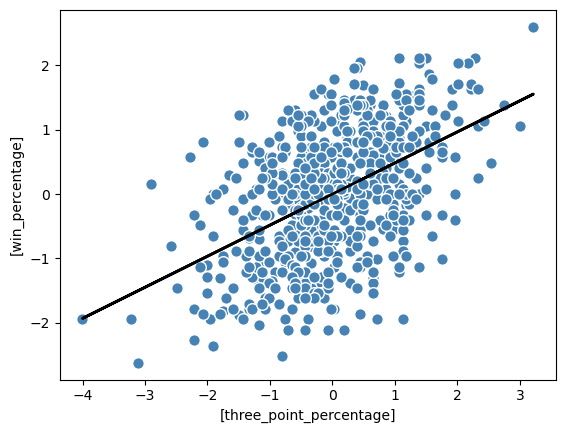

In [104]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('[three_point_percentage]')
plt.ylabel('[win_percentage]')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()
#양의 선형으로 유의미한 관계가 있긴 합니다

정규시즌말고 플레이오프 시즌도 보기

In [105]:
X1 = win_percentage_playoffs[['three_point_percentage']].values
y1 = win_percentage_playoffs['win_percentage'].values
#정규시즌처럼 똑같은 과정을 해줍니다

In [106]:
from sklearn.preprocessing import StandardScaler


sc_x1 = StandardScaler()
sc_y1 = StandardScaler()
X1_std = sc_x1.fit_transform(X1)
y1_std = sc_y1.fit_transform(y1[:, np.newaxis]).flatten()

In [107]:
lr1 = LinearRegressionGD()
lr1.fit(X1_std, y1_std)

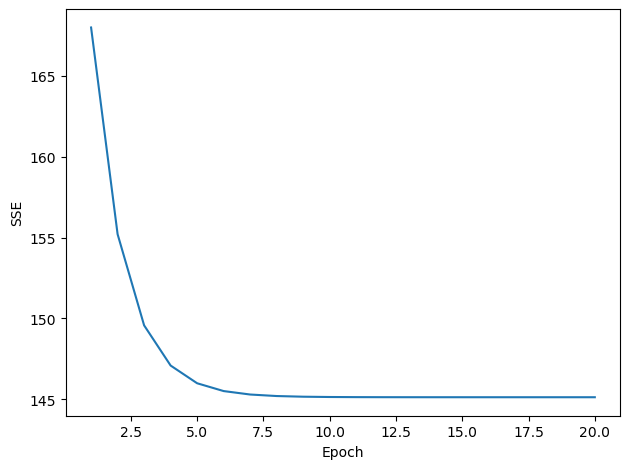

In [108]:
plt.plot(range(1, lr1.n_iter+1), lr1.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()

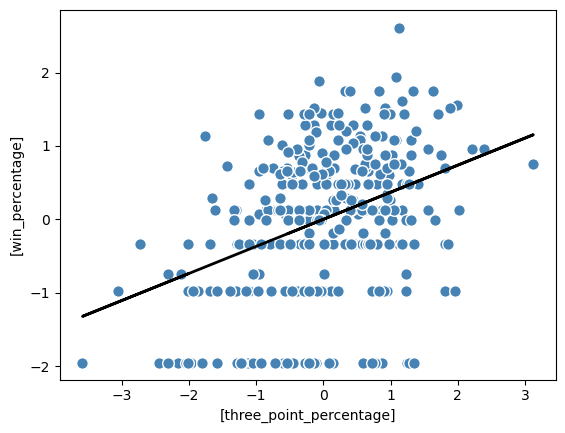

In [110]:
lin_regplot(X1_std, y1_std, lr1)
plt.xlabel('[three_point_percentage]')
plt.ylabel('[win_percentage]')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()
#데이터가 별로 없어 좋은 결과를 보이지는 않습니다


In [111]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.483
절편: 0.000


In [115]:
num_three_point_percentage_std = sc_x.transform(np.array([[35]]))
price_std = lr.predict(num_three_point_percentage_std)
print("win_percentage",sc_y.inverse_transform(price_std.reshape(-1,1)))
#이 모델로 정규시즌 3점슛 성공률에 대해 승률을 예측합니다

win_percentage [[0.48263254]]


사이킷런으로 회귀 모델의 가중치 추정

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 0.038
절편: -0.845


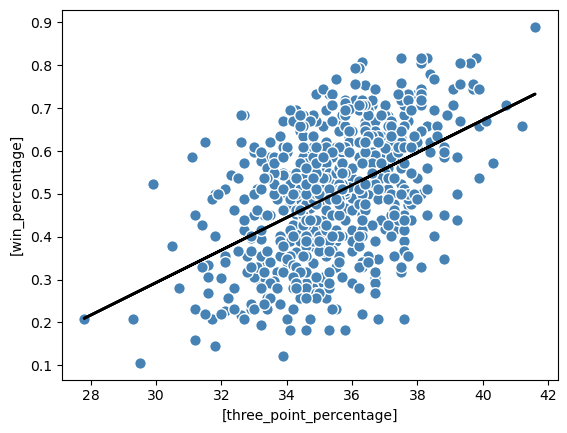

In [118]:
lin_regplot(X, y, slr)
plt.xlabel('[three_point_percentage]')
plt.ylabel('[win_percentage]')

# plt.savefig('images/10_07.png', dpi=300)
plt.show()

RANSAC을 사용하여 안정된 회귀 모델 훈련

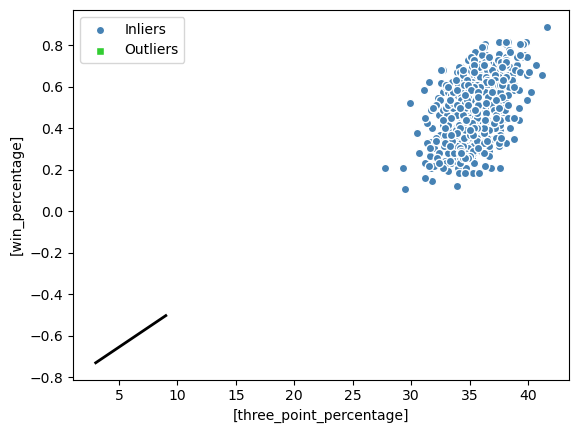

In [119]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('[three_point_percentage]')
plt.ylabel('[win_percentage]')
plt.legend(loc='upper left')

# plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [120]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 0.038
절편: -0.845


선형 회귀 모델의 성능 평가

In [126]:
from sklearn.model_selection import train_test_split

X = win_percentage.iloc[:, :-1].values
y = win_percentage['win_percentage'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
#훈련용데이터와 테스트데이터를 생성합니다

In [122]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

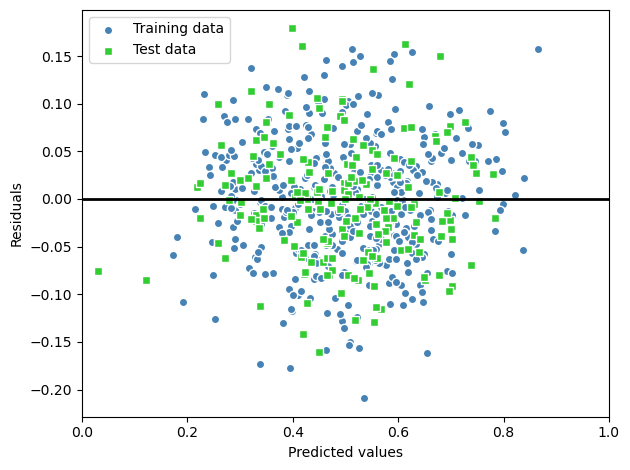

In [123]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([0, 1])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 0.004, 테스트 MSE: 0.004
훈련 R^2: 0.818, 테스트 R^2: 0.830


In [124]:
#훈련, 테스트 평균제곱오차(mse)와 훈련, 테스트 결정계수(R제곱)이 차이가 별로 없습니다